In [43]:
import pandas as pd
import numpy as np

# Load data from df_ipd_cm.csv
df_cases = pd.read_csv('https://raw.githubusercontent.com/rittiin/healthdata/main/health_copd.csv', parse_dates=['date'], index_col='date')

# Load data from dust_cm.csv
df_pm = pd.read_csv('https://raw.githubusercontent.com/rittiin/healthdata/main/dust_cm.csv', parse_dates=['date'], index_col='date')


/opt/anaconda3/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '31/01/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '28/02/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '31/03/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '30/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/opt/anaconda3/lib/python3.9

In [44]:
df = pd.merge(df_cases, df_pm, how='outer', left_index=True, right_index=True)

In [45]:
df

,cases,Value_pm
date,,
2018-01-31,5506,28.45
2018-02-28,5199,51.04
2018-03-31,5521,72.98
2018-04-30,5115,48.53
2018-05-31,5548,19.74
2018-06-30,5264,17.04
2018-07-31,5171,15.28
2018-08-31,3715,15.64
2018-09-30,265,12.98


In [46]:
# Fill missing values with mean + sd
for col in df.columns:
    mean = df[col].mean()
    std = df[col].std()
    df[col].fillna(mean + std, inplace=True)

In [47]:
# Filter data from 2018 to 2022
df = df.loc['2018':'2022']
df1 = df


train = df['2018-01-31':'2021-12-31']
test = df['2022-01-31':'2022-12-31']

In [48]:
# หา  corr caase vs pm / vs pm lag1/ vs pm lag2 + scatter plot 
df1['pm_l1'] = df1['Value_pm'].shift(1)
df1['pm_l2'] = df1['Value_pm'].shift(2)
df = df.iloc[:,0:2]

/tmp/ipykernel_44402/3400612788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pm_l1'] = df1['Value_pm'].shift(1)
/tmp/ipykernel_44402/3400612788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pm_l2'] = df1['Value_pm'].shift(2)


In [49]:
from statsmodels.tsa.api import VAR

In [50]:
for i in range(1,13):
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  19.487093662540264
BIC:  19.72328271807772

Order = 2
AIC:  19.31278800761971
BIC:  19.710318745986903

Order = 3
AIC:  19.468859610970778
BIC:  20.030932385565986

Order = 4
AIC:  19.62548636434297
BIC:  20.355382123673166

Order = 5
AIC:  19.598504062098563
BIC:  20.499583191058058

Order = 6
AIC:  19.387098251107712
BIC:  20.462798490997418

Order = 7
AIC:  19.209236011600694
BIC:  20.46306923114043

Order = 8
AIC:  19.30079421374378
BIC:  20.736341749740628

Order = 9
AIC:  18.61174379755323
BIC:  20.23265001685904

Order = 10
AIC:  18.417578164673788
BIC:  20.22754181489769

Order = 11
AIC:  18.38733822310446
BIC:  20.3901010334189

Order = 12
AIC:  17.81541525593513
BIC:  20.01474711490195



/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self.

In [63]:
# Fit VAR model
model = VAR(df)
results = model.fit(4)



/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [64]:
# View summary statistics of the model
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 05, Apr, 2023
Time:                     09:35:37
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    19.7375
Nobs:                     56.0000    HQIC:                   19.3388
Log likelihood:          -675.342    FPE:                1.95695e+08
AIC:                      19.0864    Det(Omega_mle):     1.45255e+08
--------------------------------------------------------------------
Results for equation cases
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const            2440.747573       936.865728            2.605           0.009
L1.cases            0.224245         0.151824            1.477           0.140
L1.Value_pm         2.922608        11.086725            0.264      

In [65]:
lagged_Values = df.values[-5:]

pred = results.forecast(y=lagged_Values, steps=12) 


In [66]:
forecast = pred[0:,0]
forecast = pd.DataFrame(forecast)
test1 = test['cases']
df_error = pd.concat([test1,forecast], axis =1)
df_error[0] = df_error[0].shift(-12)
df_error = df_error[0:12]
df_error['error'] = df_error['cases'] - df_error[0]
df_error['abs_error'] = np.abs(df_error['error'])
df_error['sum_error'] = df_error['abs_error'].sum()
df_error['mean_abs_error'] = df_error['sum_error']/len(df_error['sum_error'])
df_error['mape_each'] = df_error['abs_error']/df_error['cases']*100
df_error['mape'] = df_error['mape_each'].sum()/len(df_error)
df_error

,cases,0,error,abs_error,sum_error,mean_abs_error,mape_each,mape
2022-01-31 00:00:00,3873.0,4329.399874,-456.399874,456.399874,5372.080112,447.673343,11.784143,11.859888
2022-02-28 00:00:00,3656.0,4362.668895,-706.668895,706.668895,5372.080112,447.673343,19.329018,11.859888
2022-03-31 00:00:00,4149.0,4401.565396,-252.565396,252.565396,5372.080112,447.673343,6.087380,11.859888
2022-04-30 00:00:00,3637.0,4408.133860,-771.133860,771.133860,5372.080112,447.673343,21.202471,11.859888
2022-05-31 00:00:00,3974.0,4379.415518,-405.415518,405.415518,5372.080112,447.673343,10.201699,11.859888
2022-06-30 00:00:00,3868.0,4366.501061,-498.501061,498.501061,5372.080112,447.673343,12.887825,11.859888
2022-07-31 00:00:00,3535.0,4353.276653,-818.276653,818.276653,5372.080112,447.673343,23.147854,11.859888
2022-08-31 00:00:00,4163.0,4354.139462,-191.139462,191.139462,5372.080112,447.673343,4.591388,11.859888
2022-09-30 00:00:00,3649.0,4366.059883,-717.059883,717.059883,5372.080112,447.673343,19.650860,11.859888
2022-10-31 00:00:00,4187.0,4377.362412,-190.362412,190.362412,5372.080112,447.673343,4.546511,11.859888


In [67]:
import matplotlib.pyplot as plt


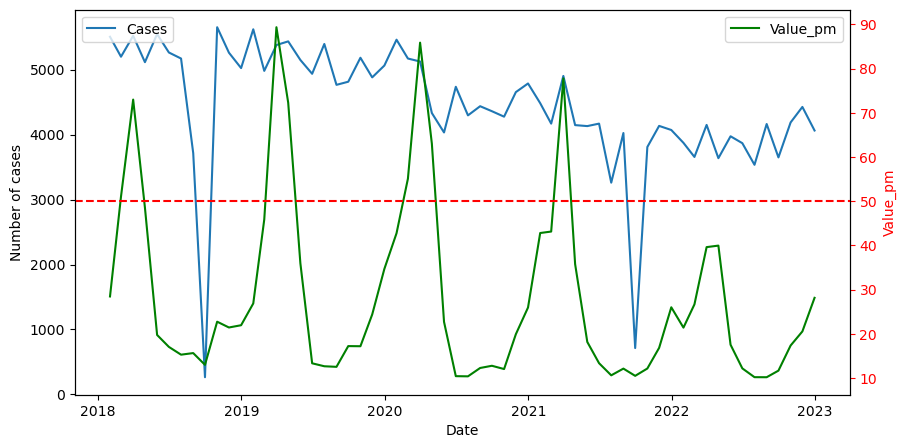

In [68]:
# Create time series plot
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
ax1.plot(df.index, df['cases'], label='Cases')
ax2.plot(df.index, df['Value_pm'], color='g', label='Value_pm')
ax2.axhline(y=50, color='r', linestyle='--')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of cases')
ax2.set_ylabel('Value_pm')
ax2.yaxis.label.set_color('r')
ax2.tick_params(axis='y', colors='r')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()